# Набор данных

**Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии**

Набор данных представляет собой статистику параметров автомобилей на вторичном рынке в Молдавии.

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный параметр.

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.

 Также среди параметров есть целевой для задачи классификации - тип трансмиссии.

 Последняя задача может быть рассмотрена, например, как пример задачи на заполнение пропусков (если продавец не указал соответствующий параметр).

# Import библиотек

In [ ]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Загрузка данных на Google Drive

In [ ]:
uploaded = files.upload()

Saving cars_moldova_cat_num.csv to cars_moldova_cat_num.csv


## Считываем файл в DataFrame



метод .read_csv(path,delimiter)

In [ ]:
df = pd.read_csv('/content/cars_moldova_cat_num.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),km_year
0,40,92,2011,4,195000.0,1800.0,2,1,7750.0,17727.272727
1,32,62,2014,11,135000.0,1500.0,0,0,8550.0,16875.000000
2,32,71,2012,11,110000.0,1500.0,0,0,6550.0,11000.000000
3,28,23,2006,11,200000.0,1600.0,3,0,4100.0,12500.000000
4,23,124,2000,5,300000.0,2200.0,0,0,3490.0,13636.363636
...,...,...,...,...,...,...,...,...,...,...
32069,42,88,2016,10,88000.0,1800.0,4,1,11500.0,14666.666667
32070,19,53,2002,3,225000.0,1800.0,3,0,4400.0,11250.000000
32071,6,77,2015,11,89000.0,1500.0,0,0,7000.0,12714.285714
32072,22,10,2006,1,370000.0,2000.0,0,0,4000.0,23125.000000


In [ ]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

# Линейная регрессия своими руками

проведем линейную регрессию только по численным столбцам. Их у нас будет 4. <br>
Введем модель целевой переменной как
$$ \begin{align*}
   &y_i = \sum_{j=1}^{4}x_{ij}w_j +\epsilon_i \\
   \text{или так }& y_i = x_{i1}\cdot w_1 + x_{i2}\cdot w_2 + x_{i3}\cdot w_3 + x_{i4}\cdot w_4 + \epsilon_i \\
   \text{или так }& y_i = X_i W^T + \epsilon_i ,
   \end{align*}
   $$
где
<ul>
    <li> $y_i$ - целевой показаль предсказания для $i$ записи в наборе данных;</li>
    <li> $X_i  = \{x_{ij}\}_{j=1}^{4}$ - набор входных параметров для $i$ результата ;</li>
    <li> $W = \{w_{j}\}_{j=1}^{4}$ - набор весовых параметров, которые мы должны подобрать в моделе;</li>
    <li> $\epsilon_i$ - некоторый набор случайных (не объясняемых нашей моделью, остаточных) значений, мы будем считать их случайных шумом.  
</ul>   
    <br> тогда наша регрессионная модель будет иметь вид
         \begin{align*}
   &\hat{y}_i = \sum_{j=1}^{4}x_{ij}w_j  \\
   \text{или так }& \hat{y}_i = x_{i1}\cdot w_1 + x_{i2}\cdot w_2 + x_{i3}\cdot w_3  + x_{i4}\cdot w_4 \\
   \text{или так }& \hat{y}_i = X_i W^T,
   \end{align*}
   
где <ul>
    <li> $\hat{y}_i $ - результат предсказания для $i$ записи в наборе данных.   </ul>   
        
Для начала разобъем данные на тренировочные и тест

In [ ]:
df_num = df[num_columns].copy()

df_num.info()

X,y = df_num.drop(columns = ['Price(euro)']).values,df_num['Price(euro)'].values

features_names = df_num.drop(columns = ['Price(euro)']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

pd.DataFrame(X_train).tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32074 entries, 0 to 32073
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  32074 non-null  int64  
 1   Distance              32074 non-null  float64
 2   Engine_capacity(cm3)  32074 non-null  float64
 3   Price(euro)           32074 non-null  float64
 4   km_year               32074 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.2 MB


,0,1,2,3
22446,0.64,0.479896,0.353333,0.251134
22447,0.74,0.465893,0.479167,0.331520
22448,0.70,0.572360,0.333333,0.356492
22449,0.70,0.581916,0.375000,0.362475
22450,0.24,0.579916,0.000000,0.147012


Введем функцию потрерь регрессии как квадрат разности между целевыми значениями и их предсказаниями
$$ L(\hat{y}_i,y_i)=L_i= (\hat{y}_i-y_i)^2 = \left(\sum_{j=1}^{4}x_{ij}w_j-y_i\right)^2 = \left(X_i W^T-y_i\right)^2 , $$
где  $L_i$ - функция потерь для результата (предсказания) с номером $i$. <br>
Также введем функцию расчета (предсказания) значений predict.


In [ ]:
def forward(weights, inputs):
    return inputs.dot(weights.T)

def loss_func(predicts, labels):
        return np.square(predicts - labels)

Протестируем обе функции

In [ ]:
weights = np.random.randn(X.shape[1])
print(weights)
yhat = forward(weights, X_train[0])
loss = np.sqrt(loss_func(yhat, y[0]))
print(yhat, y[0], loss)

[-0.54867046  1.44531061  1.14609501 -0.24376534]
0.9996497039038744 7750.0 7749.000350296096


Посмотрим на график того как меняется функция потерь в зависимости от отклонения (мультипликативного) оценки результата от его истинного значения.

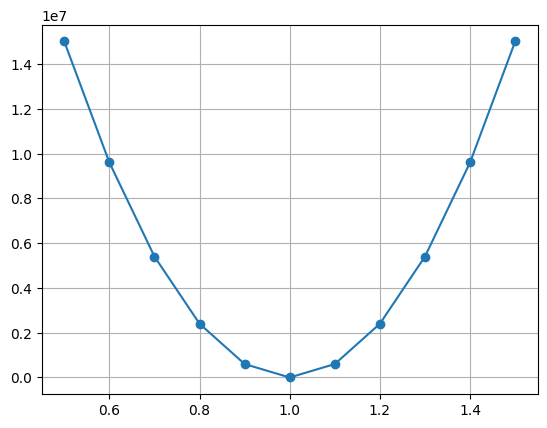

In [ ]:
decline = np.linspace(start = 0.5, stop = 1.5,num = 11)
yhat = decline* y[0]
loss = loss_func(yhat, y[0])
plt.plot(decline,loss,'-o'); plt.grid();

Сразу отметим, что нам потребуется не только сама фунция потерь, но и ее производная по набору оптимизируемых параметров $\{w_j\}$.   
$$\frac{\partial L_i}{\partial w_j} = 2\left(\sum_{j=1}^{4}x_{ij}w_j-y_i\right)x_{ij} = 2(\hat{y}_i - y_i)x_{ij},$$
где  $\frac{\partial L_i}{\partial w_j}$ - частная производная функции $L_i$ по параметру $w_j$  <br>   
тогда по набору всех переменных мы получим производную вида:
$$\nabla_{W}L_i  = 2(\hat{y}_i-y_i)\odot X_i,  $$
 где <ul>
    <li> $\nabla_{W}L_i$ - градиент, то есть набор частных производных функции $L_i$ по набору \{$w_j$\}.  
    <li> $\odot$ - операция поэлементного умножения (умножение Адамара)    

In [ ]:
def grad_loss(predicts, labels, inputs):
    return 2*(predicts - labels)*inputs/inputs.size

Проведем расчет градиента ошибки

In [ ]:
weights = np.random.randn(X.shape[1])
yhat = forward(weights, X_train[0])
print(weights)
grad = grad_loss(yhat, y[0], X[0])
print(grad)

[ 1.2311895  -0.39507802 -0.00692588 -0.13168403]
[-7.79207070e+06 -7.55571251e+08 -6.97450386e+06 -6.86882955e+07]


Оптимизацию мы будем проводить методом градиентного спуска. <br>
По сути этот метод сводится к последовательному (итерационному) пересчету значений весовых параметров обратно значеням градиента ошибки (то есть в направлении, обратном направлению роста ошибки).
<br> обозначим номер итерации как  $t$, тогда выражение для обновления весовых параметров можно записать как:

$$ W^t = W^{t-1}-\eta\nabla_{W}L(\hat{y}_i,y_i)=W^{t-1} - 2\eta (\hat{y}_i-y_i)\odot X_i^T  $$

где <ul>
<li> $\eta$ - коэффициент с которым изменяются значения весовых параметров - т.н. скорость обучения;



In [ ]:
def update_weights(grad, weights, lerning_rate):
    return weights - lerning_rate*grad

теперь проведем обновление весовых параметров

In [ ]:
lerning_rate = 0.01
weights = update_weights(grad, weights, lerning_rate)
print(weights)

[  77921.93815648 7555712.11539437   69745.03163232  686882.82381347]


Помимо того, чтобы обучать значения весовых параметров,  необходимо задать их начальные значения - то есть провести процедуру инициализации. Такую процедуру можно провести с использованием небольших случайных  значений. Разброс этих значений мы выберем как $\sqrt{weight.size}$

In [ ]:
def weights_init(weights, random_state=42):
    if np.ndim(weights)<1:
        weights = np.zeros(weights)

    np.random.seed(random_state)
    return np.random.randn(*weights.shape)/np.sqrt(weights.size)

In [ ]:
weights = weights_init(X_train.shape[1], random_state=42)
weights

array([ 0.24835708, -0.06913215,  0.32384427,  0.76151493])

Также создадим процедуру обучения. Процедура будет повторять порцесс пересчета весов методом градиентного спуска заданое число раз (epochs).<br>
Функция будет требовать на вход <ul>
    <li> $X$ - набор входных значений (т.н. батч ) в формате: $\textrm{число записей}\times\textrm{значения в записи}$;
    <li> $y$ - набор целевых переменных (labels);   
    <li> $weights$ - начальные значения весовых параметров;
    <li> $lr$ - скорость обучения ($\eta$);    
    <li> $epochs$   -  число эпох обучения.
        </ul>
Функция дает на выходе:<ul>
    <li> $weights$ - набор обученных весовых параметров;
    <li> $cost$    - график функции потерь.
 </ul>
Также отметим, что на практике мы можем обновлять весовые параметры не для кажого отдельного значения $i$, а для целого набора таких значений, тогда более верное выражение будет выглядеть как

$$ W^t = W^{t-1}-\eta\frac{1}{n}\sum_{i=0}^{n-1}\nabla_{W}L(\hat{y}_i,y_i),  $$
где $n$ - объем выборки.        

In [ ]:
def fit(X, y, weights, lr,  epochs=30):

    cost = np.zeros(epochs)
    for i in range(epochs):

        grad = np.zeros(weights.shape);
        loss = 0;

        for m in range(X.shape[0]):
            yhat  = forward(weights, X[m,:])
            grad += grad_loss(yhat,  y[m], X[m,:])
            loss += loss_func(yhat,  y[m])

        weights = update_weights(grad/X.shape[0],weights, lr)
        cost[i] = loss/X.shape[0]

    return weights, cost

Протестируем обучение

In [ ]:
def plot_cost(cost):
    plt.plot(cost, 'o-', linewidth = 4, markersize = 15, mfc='none' );
    plt.grid()
    plt.xlabel("Эпоха",fontsize=35)
    plt.ylabel("Функция Потерь",fontsize=35)
    plt.xticks(fontsize = 25)

    plt.yticks(fontsize = 25);

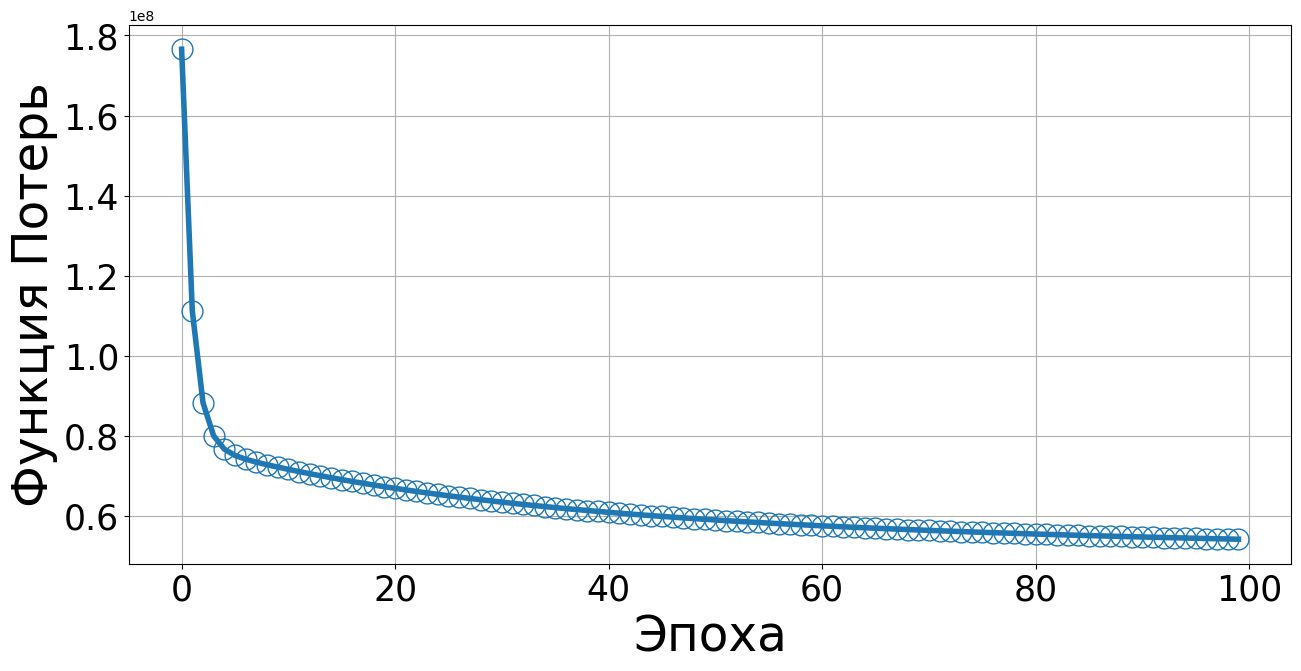

In [ ]:
weights = weights_init(X_train.shape[1], random_state=42)

weights, cost = fit(X_train, y_train, weights, lr=0.9,  epochs=100)

fig  = plt.figure(figsize=(15,7))
plot_cost(cost);

Теперь проверим как точно предсказывает наша функция, для этого мы можем воспользоваться метрикой $R^2$, метрика соотвествует относительной среднеквадратичной ошибке, она может быть расчитана как:
$$
R^2 = 1-\frac{\sum_{i=0}^{n-1}(y_i - \hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i - \mathrm{ev}(y))^2} = 1 - \frac{SS_{\rm res}}{SS_{\rm tot}},
$$
где
<ul>
    <li>$SS_{\rm res} = \sum_{i=0}^{n-1}L_i = \sum_{i=0}^{n-1}(y_i - \hat{y}_i)^2$ сумма квадратов остатков, величина, характеризующая степень того на сколько наша модель не соответствует нашим данным - то есть то, на сколько мы не можем объяснить нашей моделью наши данные;</li>
    <li>$SS_{\rm tot}$ - дисперсия данных - то есть сумма квадратов разностей значений данных и их среднего значения;</li>
    <li>$\mathrm{ev}(y) = \frac{1}{n}\sum_{i=0}^{n-1}y_i$ - среднее значение.</li>  
</ul>  

In [ ]:
def predict(weights, inputs):
    yhat = np.zeros(inputs.shape[0])

    for m in range(inputs.shape[0]):
        yhat[m] = inputs[m,:].dot(weights.T)

    return yhat

посмотрим как выглядят наши ответы на фоне реальных

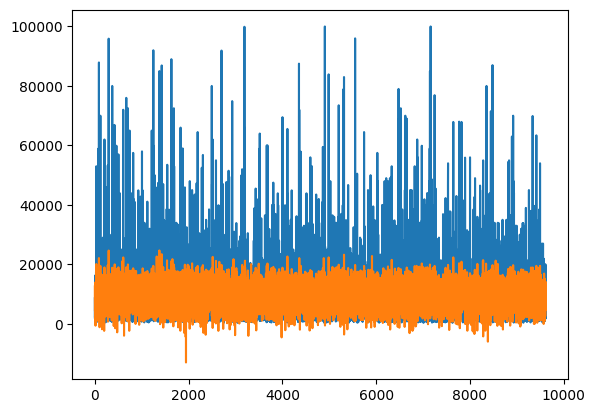

In [ ]:
yhat = predict(weights, X_test)
plt.plot(y_test, label='original')
plt.plot(yhat, label='predicted');

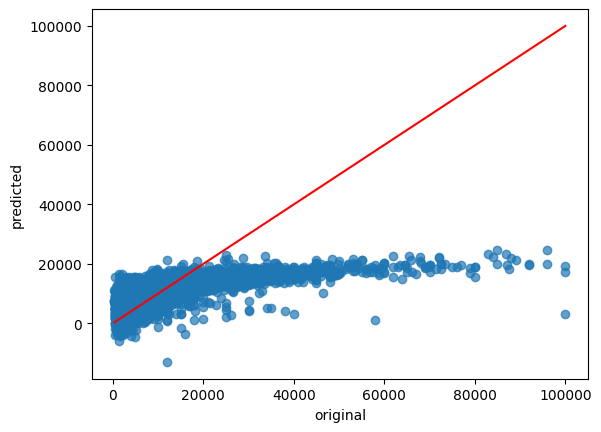

In [ ]:
plt.scatter(y_test,yhat,alpha = 0.7)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r')
plt.xlabel('original')
plt.ylabel('predicted');

In [ ]:
def r2_score(weights, inputs, labels):
    predicts = predict(weights, inputs)
    return 1-np.sum(np.square(labels-predicts))/np.sum(np.square(labels-np.mean(labels)))

In [ ]:
r2_score(weights, X_test, y_test)

0.3792007824495638

    На практике как правило, на каждой эпохе рассматривается не веся выборка, а только некоторая ее часть - т.н. батч (мини пакет).

In [ ]:
BATCH = 5000

def fit_SGD(X, y, weights, lr,  epochs=30, batch_size = BATCH, random_state = 42):

    np.random.seed(random_state)


    cost = np.zeros(epochs)
    for i in range(epochs):

        grad = np.zeros(weights.shape);
        loss = 0;

        idx_batch = np.random.randint(0,X.shape[0],batch_size)
        x_batch   = np.take(X, idx_batch, axis=0)
        y_batch   = np.take(y, idx_batch)


        for m in range(batch_size):
            yhat  = forward(weights, x_batch[m,:])
            grad += grad_loss(yhat,  y_batch[m], x_batch[m,:])
            loss += loss_func(yhat,  y_batch[m])

        weights  = update_weights(grad/batch_size,weights, lr)
        cost[i] =loss/batch_size

    return weights, cost

0.4284270588315162


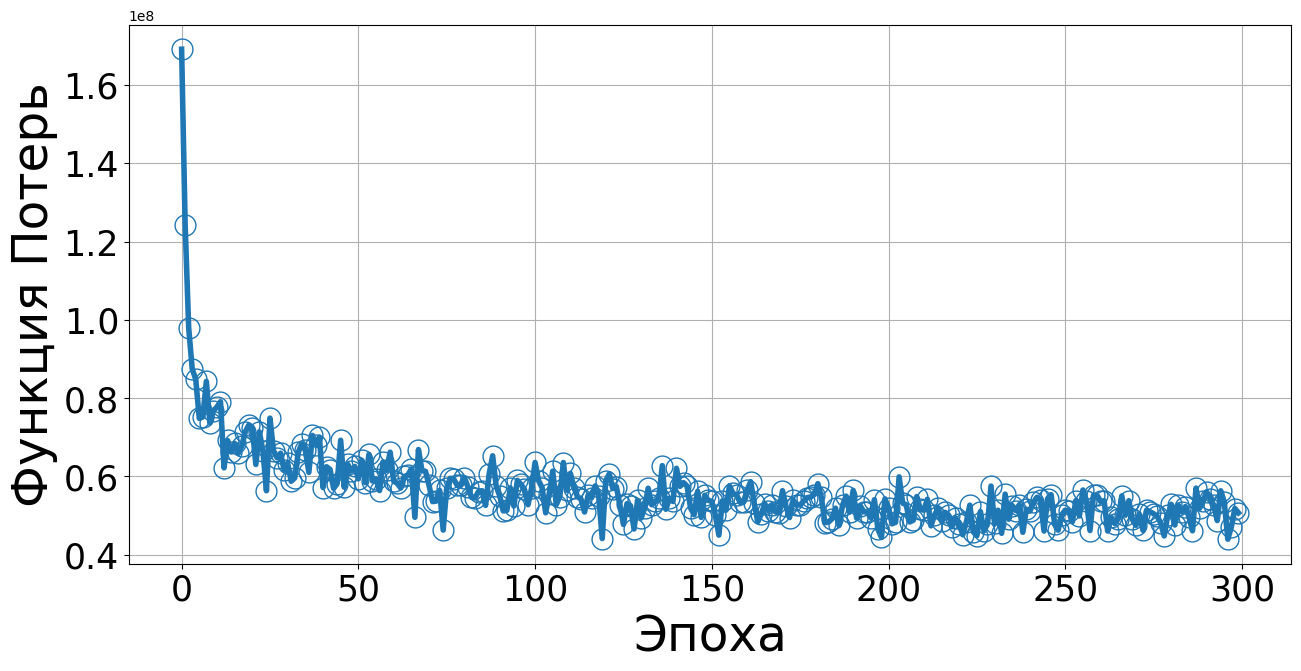

In [ ]:
weights = weights_init(X_train.shape[1], random_state=42)

weights, cost = fit_SGD(X_train, y_train, weights, lr=0.7,  epochs=300)

fig  = plt.figure(figsize=(15,7))
plot_cost(cost)

print(r2_score(weights, X_test, y_test))

Теперь давайте объединим все наши часть в один класс линейной регресии.
<br> При объединении мы сделаем две дополнительные модификации нашей модели.
<ul>
    <li> во-первых, введем в модель дополнительный член - смещение (b), тогда можно записать модель так:
        \begin{align*}
        &\hat{y}_i = \sum_{j=1}^{p}x_{ij}w_j+b \\
        \text{   или так: }&\hat{y}_i = \sum_{j=0}^{p}x_{ij}w_j, x_{i0} \equiv 1.
        \end{align*}
        обе записи формально равнозначны. <ul>
        при этом отметим, что градиент функции потерь по остаточному члену можно записать следующим образом:
        $$b^t = b^{t-1}-\eta\nabla_{b}L(\hat{y}_i,y_i)=b^{t-1} - 2\eta(\hat{y}_i-y_i)$$
        </ul>
        Мы будем использовать второй вариант, то есть объединим веса и смещния, а к данным добавим столбец единиц.
<li> Во воторых проведем векторизацию в тех местах, где у нас стояли лишнии циклы.
    <br> В том числе отметим, что выражение для расчет суммарного градиента может быть записано векторно в следующей форме
    $$2\sum_{i=0}^{n-1}(\hat{y}_i-y_i)\odot X_i^T = 2 X^T(\hat{y}-y), $$
    где $\hat{y}, y$ - массивы значений оценок и целевых результатов.
    

In [ ]:
class LinearRegression():
    def __init__(self,
                 learning_rate = 0.5,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)

        # если веса и смещения заданы
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
                self.weights = np.append(self.bias,self.weights)

    #---------------------------------
    def forward(self, X):
        return self.weights.dot(X.T)

    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size

    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size

    #---------------------------------
    def update(self):
        return self.weights - self.lr*self.grad

    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)

    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))

    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat

    #---------------------------------
    def score(self, X, y):
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))

     #---------------------------------
    def load_batch(self,X,y):
        idx_batch = np.random.randint(0,X.shape[0],self.batch_size)
        x_batch   = np.take(X, idx_batch, axis=0)
        x_batch   = self.add_bias(x_batch)
        y_batch   = np.take(y, idx_batch)
        return  x_batch, y_batch

    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)

        if self.weights is None:
            self.weights = self.init(X.shape[1])

        if self.bias is None:
            self.bias    = self.init(1)

        if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
            self.weights = np.append(self.bias,self.weights)

        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:
            x_batch   = self.add_bias(X)
            y_batch   = y

        for i in range(self.epochs):

            if self.batch_size:
                x_batch, y_batch = self.load_batch(X,y)

            yhat         = self.forward(x_batch)
            self.grad    = self.grad_step(yhat,  y_batch, x_batch)
            self.weights = self.update()
            self.cost[i] = self.loss(yhat,  y_batch)

        self.bias = self.weights[0]

    #---------------------------------
    def plot_cost(self, figsize = (12,6), title = ''):
        plt.figure(figsize = figsize)
        plt.plot(self.cost)
        plt.grid()
        plt.xlabel('Эпоха', fontsize = 24)
        plt.ylabel('Функция Потерь', fontsize = 24)
        plt.title(title, fontsize = 24)
        plt.show()

    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

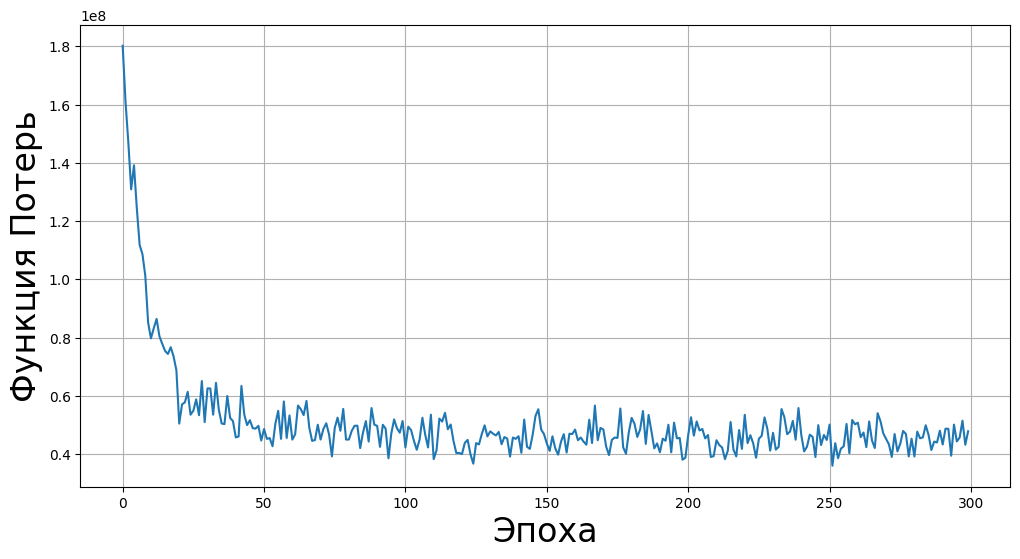

train R2: 0.4861; test R2: 0.4986


In [ ]:
regr = LinearRegression(learning_rate=0.5,epochs=300,batch_size=3000)
regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))


посмотрим веса

In [ ]:
def vis_weigths(weights, names):
    numbers = np.arange(0,len(weights))
    tick_labels = names
    cc=['']*len(numbers)
    for n,val in enumerate(weights):
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    plt.bar(x = numbers, height = weights, color = cc)
    plt.xticks(np.arange(0,len(weights)),tick_labels, rotation = 45 );

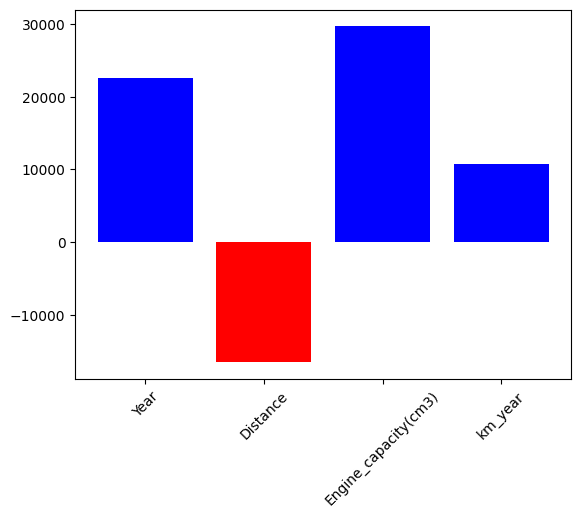

In [ ]:
w, b = regr.get_w_and_b()

vis_weigths(w, features_names)


In [ ]:
np.sum(np.abs(w))

79569.04399628071

# Регуляризация линейной регрессии

### Регуляризация Тихонова

Часто бывает так, что обычный градиентный спуск приводит к переобучению модели. Переобучение это ситуация, когда точность на обучающих данных значительно выше, чем на тестовых.

В таких случаях также можно сказать, что данные плохо обусловлены - то есть любые небольшие изменения по отношению к тренировочной выборке приведут к большим изменениям в ответе модели. В целом это будет означать, что модель дает очень большой разброс результатов.

Такой разброс может быть снижен при помощи различных техник регуляризации. Смысл использования таких техник сводится к тому, что при обучении модели к выражению обновления весовых параметров добавляется дополнительное условие.

Например, можно добавить условие ограничение суммы квадратов весовых параметров. Такое предположение называется регрессией Тихонова или гребневой регрессией (а также L2 регуляризацией).

Технически такая регуляризация соответствует предположению, что распределение результатов работы модели имеет вид нормального распределения. Такое предположение часто допустимо и оправдано.<br>
Регрессия Тихонова может быть записана в следующей форме:

$$ \begin{cases}
L(\hat{y}_i,y_i)\to \min \\
\| W \|_2^2< \mathrm{const}
\end{cases}
\to L(\hat{y}_i,y_i) + \frac{\lambda}{2n}\sum_{j=1}^{p} W_j^2\to \min,
$$
где  
<ul>
     <li> $ \| W \|_2^2 = \sum_{j=1}^{p} W_j^2$ - норма Фробениуса для вектора или матрицы;
     <li> $ \lambda $   - регуляризационный множитель;  
     <li> $p$ - размер вектора весовых параметров;
     <li> $n$ - объем выборки весовых параметров;   
</ul>
Закон изменения весовых параметров для данной модели можно зписать как:
$$ W^t = W^{t-1}-\eta\frac{1}{n}\sum_{i=0}^{n-1}\nabla_{W}L(\hat{y}_i,y_i) + \frac{\lambda}{n}\sum_{j=1}^{p} W_j. $$
Запишем новую версию регрессии. Для этого запишем новый класс, наследующий от уже созданного и перепишем в нем методы `loss`     и `update`. Также отметим, что смещение не регуляризуется !

In [ ]:
class RidgeRegression(LinearRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l2_penalty = 0.001,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         random_state = random_state)
        self.l2_penalty = l2_penalty
    #---------------------------------
    def loss(self,yhat, y):
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        return np.square(yhat - y).mean() + l2_term


    #---------------------------------
    def update(self):
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad + l2_term)


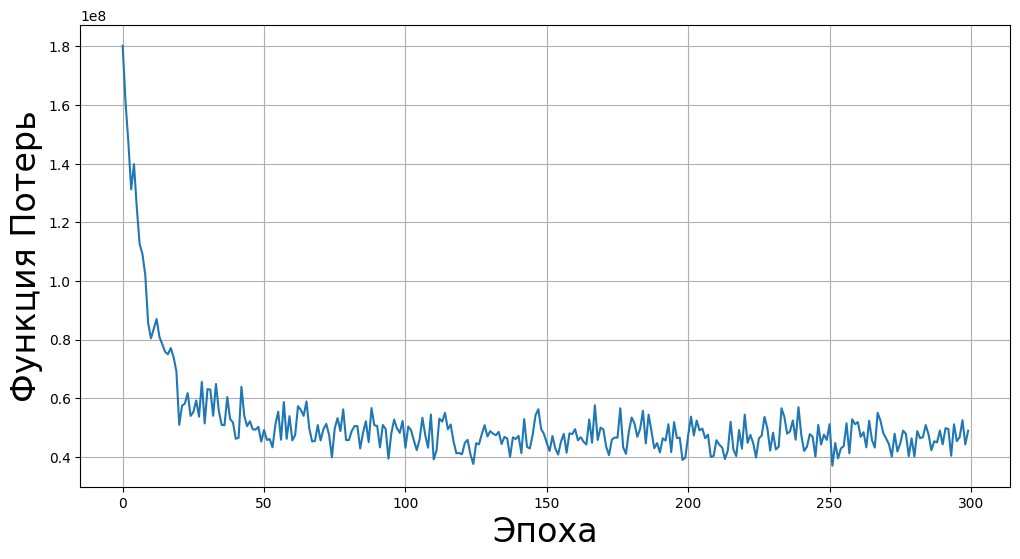

train R2: 0.4858; test R2: 0.4975


In [ ]:
regr = RidgeRegression(learning_rate=0.5,epochs=300,batch_size=3000, l2_penalty = 0.001)
regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

посмотрим веса

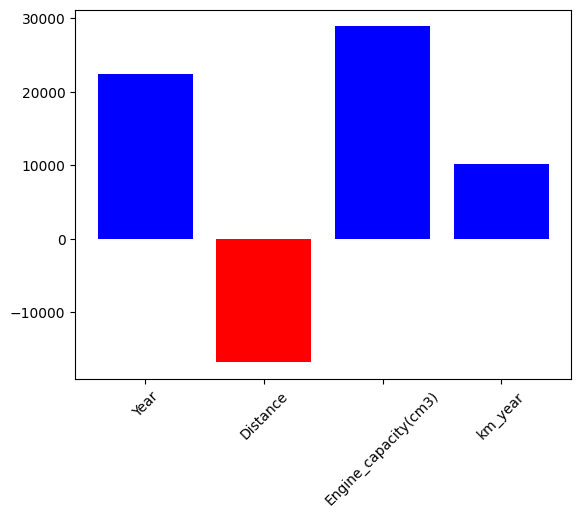

In [ ]:
w, b = regr.get_w_and_b()

vis_weigths(w, features_names)

In [ ]:
np.sum(np.abs(w))

78317.62048064731

### Регуляризация L1
В ряде случаев, когда разброс данных оказывается очень большим, регуляризации L2 может оказаться бесполезной или даже вредной. Дело в том, что в функции потерь мы учитываем веса в квадрате и большие колебания весовых параметров приведут к в квадрате большим колебаниям в значениях функции потерь. Часто эта ситуация является недопустимой.

В таких случаях следует выбирать более устойчивые (робастные методы). Робастные методы могут быть менее точными, однако более стабильными. Одним из наиболее распространённых робастных методов является L1 регуляризация. В этом случае выражение для функции потерь может быть записано следующим образом:
$$ \begin{cases}
L(\hat{y}_i,y_i)\to \min \\
\| W \|_1^1 \mathrm{const}
\end{cases}
\to L(\hat{y}_i,y_i) + \frac{\lambda}{2n}\sum_{j=1}^{p} W_j\to \min,
$$
где  
<ul>
     <li> $ \| W \|_1^1 = \sum_{j=1}^{p} W_j$ - норма L1 для вектора или матрицы;
     <li> $ \lambda $   - регуляризационный множитель;  
     <li> $p$ - размер вектора весовых параметров;
     <li> $n$ - объем выборки весовых параметров;   
</ul>
Закон изменения весовых параметров для данной модели можно зписать как:
$$ W^t = W^{t-1}-\eta\frac{1}{n}\sum_{i=0}^{n-1}\nabla_{W}L(\hat{y}_i,y_i) + \lambda. $$
Запишем новую версию регрессии. Для этого запишем новый класс, наследующий от уже созданного и перепишем в нем методы `loss`     и `update`.

In [ ]:
class LassoRegression(LinearRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l1_penalty = 0.001,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         random_state = random_state)
        self.l1_penalty = l1_penalty

    #---------------------------------
    def loss(self,yhat, y):
        l1_term = self.l1_penalty*np.sum(self.weights[1:])
        return np.square(yhat - y).mean() + l1_term

    #---------------------------------
    def update(self):
        return self.weights - self.lr*(self.grad + np.sign(self.weights)*self.l1_penalty)

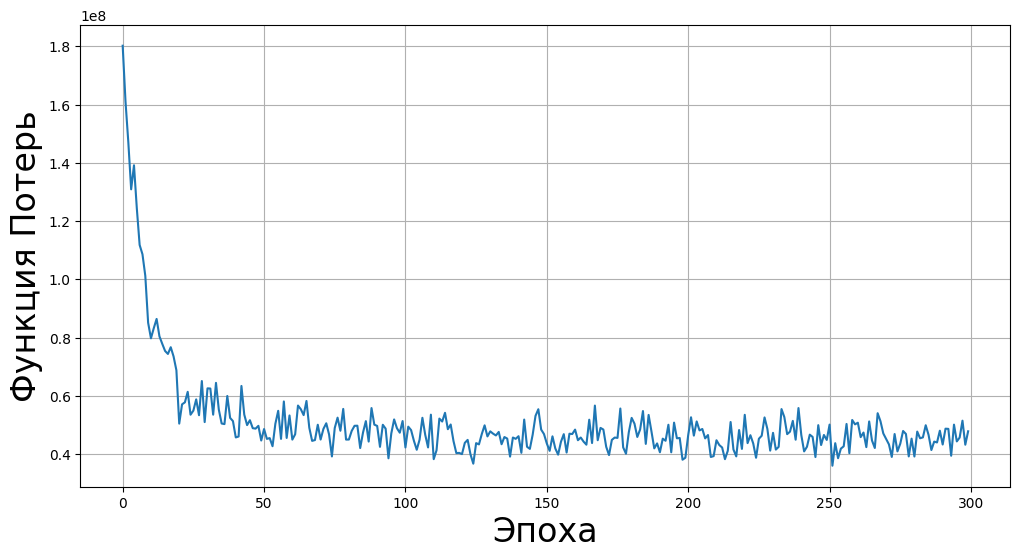

train R2: 0.4861; test R2: 0.4986


In [ ]:
regr = LassoRegression(learning_rate=0.5,epochs=300,batch_size=3000, l1_penalty = 0.1)
regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

посмотрим веса

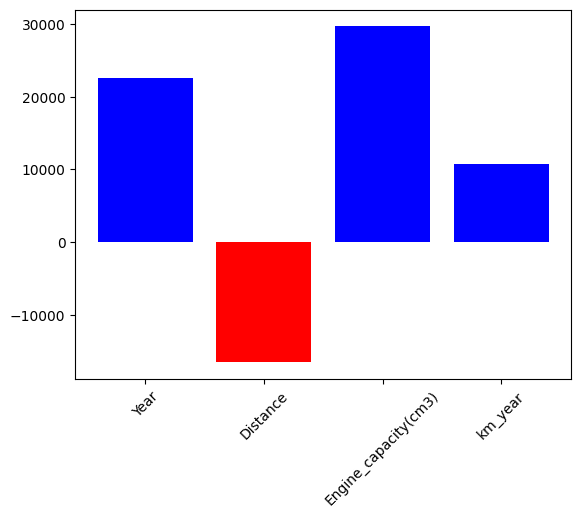

In [ ]:
w, b = regr.get_w_and_b()

vis_weigths(w, features_names)

In [ ]:
np.sum(np.abs(w))

79557.81901738435

### Эластичная регуляризация
Отметим, что во многих случаях неизвестно какая модель регуляризации окажется лучше, поэтому целесообразно использовать их обе вместе. Такая модель регуляризации называется эластической регуляризацией. Попробуем ее реализовать

In [ ]:
class ElasticRegression(LinearRegression):
    def __init__(self,
                 learning_rate = 0.5,
                 l1_penalty = 0.001,
                 l2_penalty = 0.001,
                 epochs = 100,
                 weights = None,
                 bias    = None,
                 batch_size   = 1000,
                 random_state = 42):

        super().__init__(learning_rate = learning_rate,
                         epochs = epochs,
                         weights = weights,
                         bias    = bias,
                         batch_size   = batch_size,
                         random_state = random_state)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty
    #---------------------------------
    def loss(self,yhat, y):
        l1_term = self.l1_penalty*np.sum(self.weights[1:])
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        return np.square(yhat - y).mean() + l1_term + l2_term


    #---------------------------------
    def update(self):
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad +  np.sign(self.weights)*self.l1_penalty + l2_term)

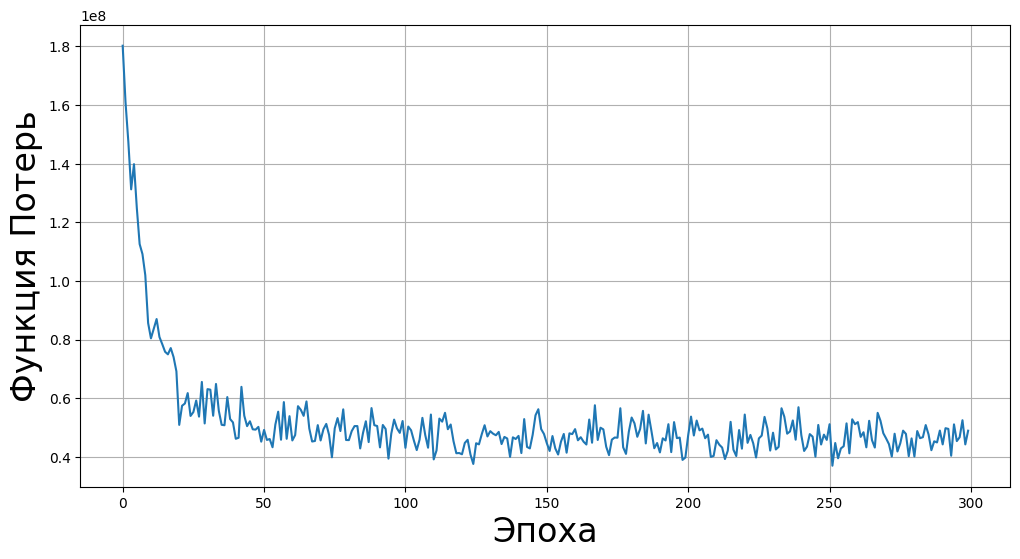

0.49746366836976674 0.48580815010765055


In [ ]:
regr = ElasticRegression(learning_rate=0.5,epochs=300,batch_size=3000, l1_penalty = 0.1,l2_penalty = 0.001 )
regr.fit(X_train, y_train)

regr.plot_cost()

print(regr.score(X_test, y_test), regr.score(X_train, y_train))

посмотрим веса

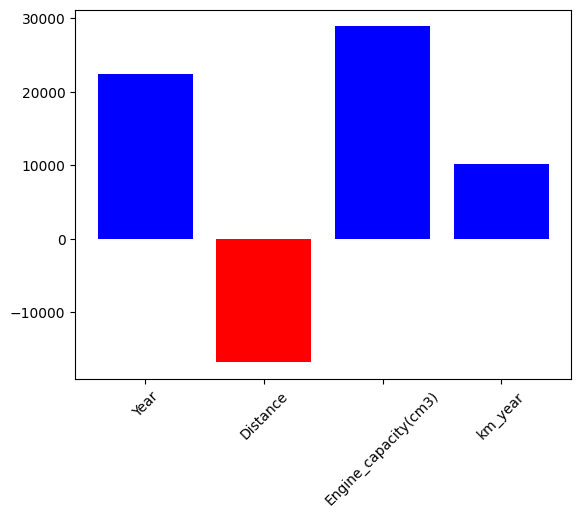

In [ ]:
w, b = regr.get_w_and_b()

vis_weigths(w, features_names)

In [ ]:
np.sum(np.abs(w))

78306.59969642472

 Задания:

# 1.
Используя функцию dataset, сгенерируйте линейные зависимости с другими параметрами a, b, N, noise_power (см. с. 49)
и проверьте модель линейной регрессии на этих данных.

Ответ:

In [ ]:
def true_fun(x, a=np.pi, b = 0, f=np.sin):
    x = np.atleast_1d(x)[:]
    a = np.atleast_1d(a)
    if f is None: f = lambda x:x
    x = np.sum([ai*np.power(x, i+1) for i,ai in enumerate(a)], axis=0)
    return f(x + b)

def noises(shape, noise_power):
    return np.random.randn(*shape) * noise_power

def dataset(a, b, f=None, N=250, x_max=1, noise_power=0, random_x=True, seed=42):
    np.random.seed(seed)
    if random_x:
        x = np.sort(np.random.rand(N)) * x_max
    else:
        x = np.linspace(0, x_max, N)
    y_true = np.array([])
    for f_ in np.append([], f):
        y_true = np.append(y_true, true_fun(x, a, b, f_))
    y_true = y_true.reshape(-1, N).T
    y = y_true + noises(y_true.shape, noise_power)
    return y, y_true, np.atleast_2d(x).T


## 1. Генерация данных
Сгенерируем данные с другими параметрами, отличными от примера.

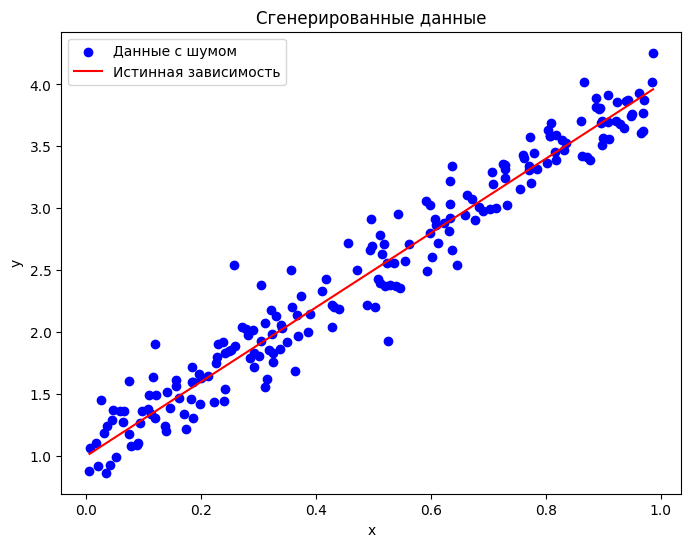

In [ ]:
# Параметры для генерации данных
a = 3
b = 1
N = 200  # Количество точек данных
noise_power = 0.2  # Уровень шума

# Генерация данных
y, y_true, x = dataset(a=a, b=b, f=None, N=N, x_max=1, noise_power=noise_power, seed=42)

# Визуализация сгенерированных данных
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Данные с шумом', color='blue')
plt.plot(x, y_true, label='Истинная зависимость', color='red')
plt.title('Сгенерированные данные')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## 2. Построение модели линейной регрессии
Используем модель линейной регрессии из библиотеки scikit-learn.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Инициализация и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

## 3. Оценка модели и визуализация
Теперь оценим качество модели и визуализируем результаты.

Mean Squared Error (MSE): 0.0434
R-squared (R²): 0.9391


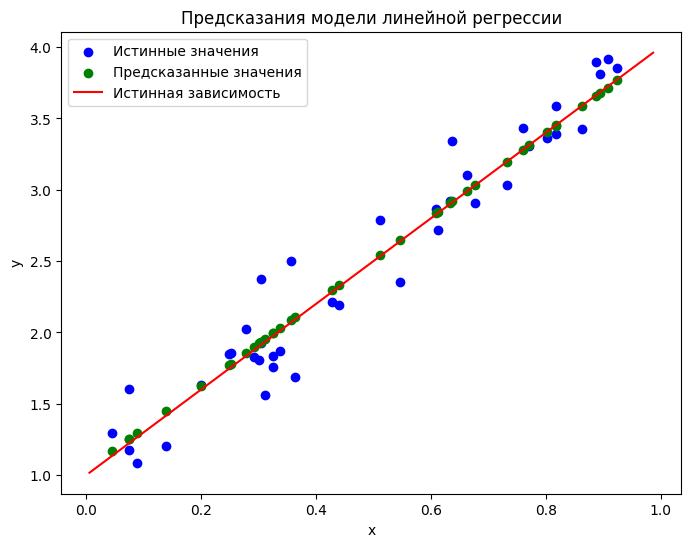

In [ ]:
# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R²): {r2:.4f}')

# Визуализация предсказаний модели
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Истинные значения', color='blue')
plt.scatter(X_test, y_pred, label='Предсказанные значения', color='green')
plt.plot(x, y_true, label='Истинная зависимость', color='red')
plt.title('Предсказания модели линейной регрессии')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# 2.
Используя функцию dataset, сгенерируйте гармонические зависимости с другими параметрами (см. с. 50) и проверьте различные степени полиномов исходных данных и разные типы регуляризации. Посмотрите, что произойдет, если увеличить
регуляризационный множитель

Ответ:

## 1. Генерация данных
Сначала сгенерируем данные с различными параметрами.

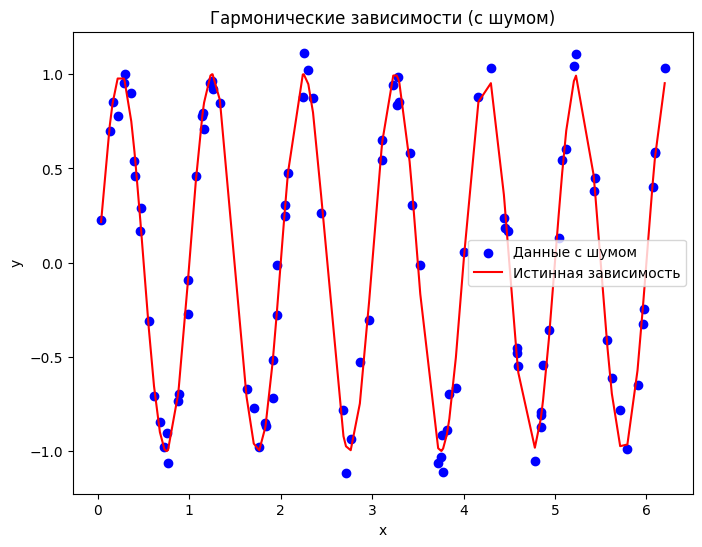

In [ ]:
# Генерация данных с гармонической зависимостью
y, y_true, x = dataset(a=2*np.pi, b=0, f=np.sin, N=100, x_max=2*np.pi, noise_power=0.1, seed=42)

# Визуализация сгенерированных данных
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Данные с шумом', color='blue')
plt.plot(x, y_true, label='Истинная зависимость', color='red')
plt.title('Гармонические зависимости (с шумом)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## 2. Полиномиальные признаки и модель линейной регрессии
Используем PolynomialFeatures для добавления полиномиальных признаков и обучим модель линейной регрессии с различными степенями.

MSE для полинома степени 3: 0.5063


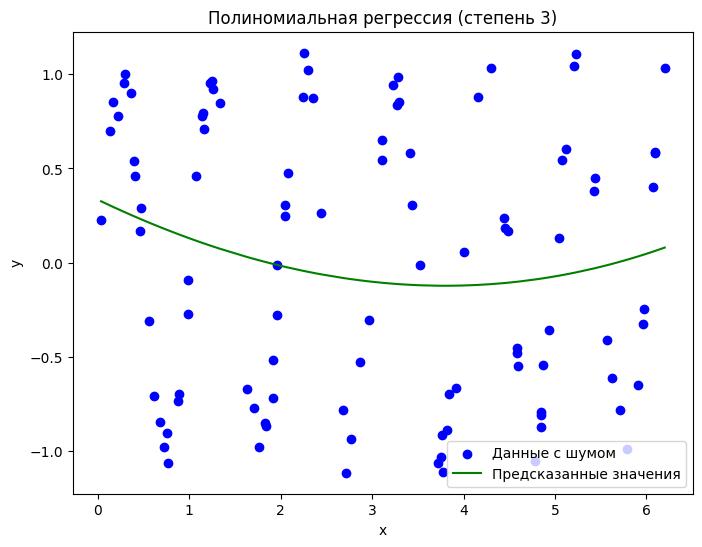

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Полиномиальные признаки (степень 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(x)

# Модель линейной регрессии
model = LinearRegression()
model.fit(X_poly, y)

# Предсказание
y_pred = model.predict(X_poly)

# Оценка модели
mse = mean_squared_error(y, y_pred)
print(f'MSE для полинома степени 3: {mse:.4f}')

# Визуализация предсказанных значений
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Данные с шумом', color='blue')
plt.plot(x, y_pred, label='Предсказанные значения', color='green')
plt.title('Полиномиальная регрессия (степень 3)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## 3. Применение регуляризации
Попробуем применить L2-регуляризацию (Ridge) и L1-регуляризацию (Lasso) для разных значений регуляризационного множителя.

MSE для Ridge-регрессии: 0.5073
MSE для Lasso-регрессии: 0.5117


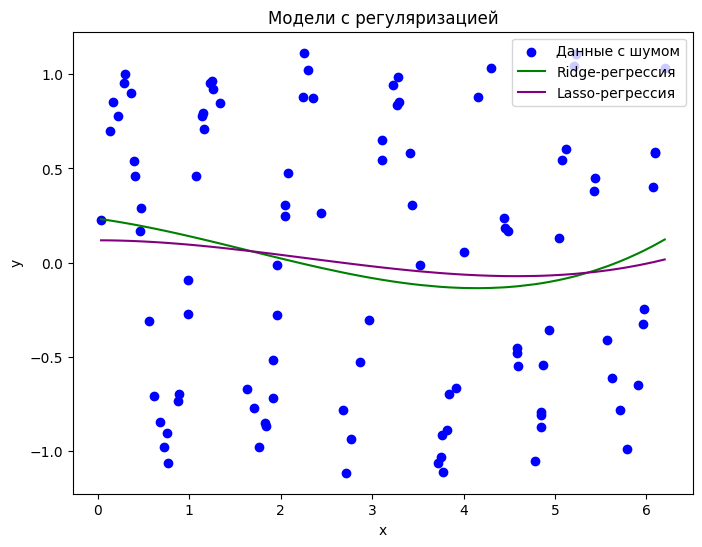

In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Применение Ridge-регрессии (L2-регуляризация)
ridge_model = Ridge(alpha=10)  # alpha - регуляризационный множитель
ridge_model.fit(X_poly, y)
y_ridge_pred = ridge_model.predict(X_poly)

# Применение Lasso-регрессии (L1-регуляризация)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_poly, y)
y_lasso_pred = lasso_model.predict(X_poly)

# Оценка моделей
mse_ridge = mean_squared_error(y, y_ridge_pred)
mse_lasso = mean_squared_error(y, y_lasso_pred)

print(f'MSE для Ridge-регрессии: {mse_ridge:.4f}')
print(f'MSE для Lasso-регрессии: {mse_lasso:.4f}')

# Визуализация результатов регуляризации
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Данные с шумом', color='blue')
plt.plot(x, y_ridge_pred, label='Ridge-регрессия', color='green')
plt.plot(x, y_lasso_pred, label='Lasso-регрессия', color='purple')
plt.title('Модели с регуляризацией')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## 4. Изменение регуляризационного множителя
Теперь попробуем увеличить регуляризационный множитель и посмотрим, как это повлияет на модель.

In [ ]:
# Увеличение регуляризационного множителя для Ridge
ridge_model_strong = Ridge(alpha=100)  # Больший alpha
ridge_model_strong.fit(X_poly, y)
y_ridge_strong_pred = ridge_model_strong.predict(X_poly)

# Увеличение регуляризационного множителя для Lasso
lasso_model_strong = Lasso(alpha=1)
lasso_model_strong.fit(X_poly, y)
y_lasso_strong_pred = lasso_model_strong.predict(X_poly)

# Оценка моделей
mse_ridge_strong = mean_squared_error(y, y_ridge_strong_pred)
mse_lasso_strong = mean_squared_error(y, y_lasso_strong_pred)

print(f'MSE для Ridge-регрессии с большим alpha: {mse_ridge_strong:.4f}')
print(f'MSE для Lasso-регрессии с большим alpha: {mse_lasso_strong:.4f}')


MSE для Ridge-регрессии с большим alpha: 0.5083
MSE для Lasso-регрессии с большим alpha: 0.5212


# 3.
Используйте любую из подготовленных вами моделей линейной регрессии для предсказания цены автомобилей в наборе
данных Cars. Для оценки качества модели используйте отложенную выборку и несколько метрик регрессии. Сравните результаты модели при использовании только числовых признаков и при добавлении категориальных признаков с помощью
One-Hot-кодирования.

## 1. Загрузка данных и предварительная обработка

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Загрузка данных
df = pd.read_csv('/content/cars_moldova_cat_num.csv')

# Просмотр данных
print(df.head())


   Make  Model  Year  Style  Distance  Engine_capacity(cm3)  Fuel_type  \
0    40     92  2011      4  195000.0                1800.0          2   
1    32     62  2014     11  135000.0                1500.0          0   
2    32     71  2012     11  110000.0                1500.0          0   
3    28     23  2006     11  200000.0                1600.0          3   
4    23    124  2000      5  300000.0                2200.0          0   

   Transmission  Price(euro)       km_year  
0             1       7750.0  17727.272727  
1             0       8550.0  16875.000000  
2             0       6550.0  11000.000000  
3             0       4100.0  12500.000000  
4             0       3490.0  13636.363636  


## 2. Разделение данных на обучающую и тестовую выборки
Разделим данные на признаки (X) и целевую переменную (y), где Price(euro) — целевая переменная.

In [ ]:
# Целевая переменная
y = df['Price(euro)']

# Выбор только числовых признаков
X_numeric = df.select_dtypes(include=[float, int]).drop(columns=['Price(euro)'])

# Разделение данных на обучающую и тестовую выборки
X_train_num, X_test_num, y_train, y_test = train_test_split(X_numeric, y, test_size=0.3, random_state=42)


## 3. Линейная регрессия только с числовыми признаками
Обучим модель линейной регрессии с использованием только числовых признаков.

In [ ]:
# Модель линейной регрессии
model = LinearRegression()
model.fit(X_train_num, y_train)

# Предсказания
y_pred_num = model.predict(X_test_num)

# Оценка качества модели
mse_num = mean_squared_error(y_test, y_pred_num)
mae_num = mean_absolute_error(y_test, y_pred_num)
r2_num = r2_score(y_test, y_pred_num)

print(f'MSE (числовые признаки): {mse_num:.4f}')
print(f'MAE (числовые признаки): {mae_num:.4f}')
print(f'R^2 (числовые признаки): {r2_num:.4f}')


MSE (числовые признаки): 47384707.8240
MAE (числовые признаки): 4012.6402
R^2 (числовые признаки): 0.5152


## 4. One-Hot-кодирование категориальных признаков и обучение модели
Добавим категориальные признаки с помощью One-Hot-кодирования и обучим модель заново.

In [ ]:
# Выбор категориальных признаков
X_categorical = df.select_dtypes(include=[object])

# One-Hot-кодирование категориальных признаков
encoder = OneHotEncoder(sparse=False, drop='first')
X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_categorical), columns=encoder.get_feature_names_out())

# Объединение числовых и категориальных признаков
X_combined = pd.concat([X_numeric, X_cat_encoded], axis=1)

# Разделение на обучающую и тестовую выборки
X_train_comb, X_test_comb, y_train_comb, y_test_comb = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Обучение модели
model_comb = LinearRegression()
model_comb.fit(X_train_comb, y_train_comb)

# Предсказания
y_pred_comb = model_comb.predict(X_test_comb)

# Оценка качества модели
mse_comb = mean_squared_error(y_test_comb, y_pred_comb)
mae_comb = mean_absolute_error(y_test_comb, y_pred_comb)
r2_comb = r2_score(y_test_comb, y_pred_comb)

print(f'MSE (числовые + категориальные признаки): {mse_comb:.4f}')
print(f'MAE (числовые + категориальные признаки): {mae_comb:.4f}')
print(f'R^2 (числовые + категориальные признаки): {r2_comb:.4f}')


MSE (числовые + категориальные признаки): 47384707.8240
MAE (числовые + категориальные признаки): 4012.6402
R^2 (числовые + категориальные признаки): 0.5152


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## 5. Сравнение моделей
Теперь можно сравнить качество моделей, используя только числовые признаки и сочетание числовых и категориальных признаков.

In [ ]:
# Сравнение метрик
results = {
    'Модель': ['Только числовые признаки', 'Числовые + категориальные признаки'],
    'MSE': [mse_num, mse_comb],
    'MAE': [mae_num, mae_comb],
    'R^2': [r2_num, r2_comb]
}

# Создание DataFrame для наглядного сравнения
results_df = pd.DataFrame(results)

# Вывод результатов
print(results_df)


                               Модель           MSE          MAE       R^2
0            Только числовые признаки  4.738471e+07  4012.640162  0.515184
1  Числовые + категориальные признаки  4.738471e+07  4012.640162  0.515184


# 4.
Сравните работу реализованных алгоритмов с функциями библиотеки scikit-learn:

## 1. Простая линейная регрессия через метод наименьших квадратов

In [ ]:
from sklearn.linear_model import LinearRegression

# Обучение модели
lin_reg = LinearRegression()
lin_reg.fit(X_train_comb, y_train_comb)

# Предсказания
y_pred_lin_reg = lin_reg.predict(X_test_comb)

# Метрики
mse_lin = mean_squared_error(y_test_comb, y_pred_lin_reg)
mae_lin = mean_absolute_error(y_test_comb, y_pred_lin_reg)
r2_lin = r2_score(y_test_comb, y_pred_lin_reg)


## 2. Простая линейная регрессия через градиентный спуск

In [ ]:
from sklearn.linear_model import SGDRegressor

# Обучение модели
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train_comb, y_train_comb)

# Предсказания
y_pred_sgd = sgd_reg.predict(X_test_comb)

# Метрики
mse_sgd = mean_squared_error(y_test_comb, y_pred_sgd)
mae_sgd = mean_absolute_error(y_test_comb, y_pred_sgd)
r2_sgd = r2_score(y_test_comb, y_pred_sgd)


## 3. Регрессия с регуляризацией Тихонова (Ridge)

In [ ]:
from sklearn.linear_model import Ridge

# Обучение модели
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_comb, y_train_comb)

# Предсказания
y_pred_ridge = ridge_reg.predict(X_test_comb)

# Метрики
mse_ridge = mean_squared_error(y_test_comb, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test_comb, y_pred_ridge)
r2_ridge = r2_score(y_test_comb, y_pred_ridge)


## 4. Регрессия с L1-регуляризацией (Lasso)

In [ ]:
from sklearn.linear_model import Lasso

# Обучение модели
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_comb, y_train_comb)

# Предсказания
y_pred_lasso = lasso_reg.predict(X_test_comb)

# Метрики
mse_lasso = mean_squared_error(y_test_comb, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test_comb, y_pred_lasso)
r2_lasso = r2_score(y_test_comb, y_pred_lasso)


## 5. Эластичная регуляризация (ElasticNet)

In [ ]:
from sklearn.linear_model import ElasticNet

# Обучение модели
elasticnet_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet_reg.fit(X_train_comb, y_train_comb)

# Предсказания
y_pred_elastic = elasticnet_reg.predict(X_test_comb)

# Метрики
mse_elastic = mean_squared_error(y_test_comb, y_pred_elastic)
mae_elastic = mean_absolute_error(y_test_comb, y_pred_elastic)
r2_elastic = r2_score(y_test_comb, y_pred_elastic)


## 6. Сравнение моделей
Теперь можно собрать все метрики для сравнения:

In [ ]:
# Сравнение метрик
results = {
    'Модель': ['LinearRegression', 'SGDRegressor', 'Ridge', 'Lasso', 'ElasticNet'],
    'MSE': [mse_lin, mse_sgd, mse_ridge, mse_lasso, mse_elastic],
    'MAE': [mae_lin, mae_sgd, mae_ridge, mae_lasso, mae_elastic],
    'R^2': [r2_lin, r2_sgd, r2_ridge, r2_lasso, r2_elastic]
}

# Создание DataFrame для наглядного сравнения
results_df = pd.DataFrame(results)

# Вывод результатов
print(results_df)


             Модель           MSE           MAE           R^2
0  LinearRegression  4.738471e+07  4.012640e+03  5.151841e-01
1      SGDRegressor  1.466644e+37  3.483797e+18 -1.500594e+29
2             Ridge  4.738470e+07  4.012636e+03  5.151841e-01
3             Lasso  4.738471e+07  4.012634e+03  5.151840e-01
4        ElasticNet  4.745033e+07  4.015122e+03  5.145127e-01


# Контрольные вопросы

## 1. Перечислите возможные гиперпараметры модели линейной регрессии

Ответ:
Возможные гиперпараметры модели линейной регрессии:

1) alpha (для моделей с регуляризацией, например, Ridge, Lasso, ElasticNet) — коэффициент регуляризации.

2) max_iter — максимальное количество итераций (для SGDRegressor).

3) tol — критерий сходимости (для SGDRegressor).

4) learning_rate — скорость обучения (для SGDRegressor, если используется).

5) fit_intercept — учитывать ли смещение в модели.

6) normalize — нормализация признаков перед обучением (в старых версиях scikit-learn).

Эти гиперпараметры позволяют настроить модели линейной регрессии для различных задач и данных.

## 2. Может ли коэффициент детерминации быть отрицательным числом?

Ответ:
Да, коэффициент детерминации (R²) может быть отрицательным.

R² измеряет, насколько хорошо модель объясняет вариацию целевой переменной по сравнению с простым средним значением. Его значения могут варьироваться от -∞ до 1:

Значение 1 означает, что модель идеально предсказывает все данные.
Значение 0 означает, что модель предсказывает на уровне среднего значения целевой переменной.
Отрицательное значение возникает, если модель предсказывает хуже, чем просто среднее значение, то есть ошибки модели больше, чем если бы вы использовали среднее значение всех целевых значений для предсказаний.
Таким образом, отрицательное R² указывает на то, что модель неадекватно объясняет данные.

## 3. Оцените MSE для следующих данных: реальные значения y {1, 2, 3, 4}, предсказания модели image.png {2, 1, 4, 6}.

Ответ:
MSE (средняя квадратическая ошибка) — это оценка среднего значения квадрата ошибок, различие между предсказанием и фактическим значением. Эту метрику удобно использовать для выявления аномалий.



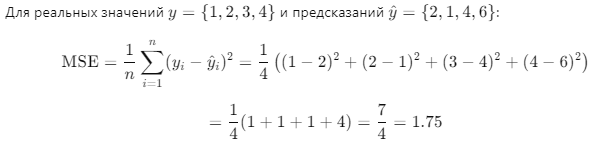

## 4. Предположим, что у вас есть вектор весов w {10, 5, 6}. Вы посчитали градиент функции потерь, который равен {20, −10, 40}. Посчитайте обновленный вектор весов при условии, что скорость обучения составляет 0.1.

Ответ:

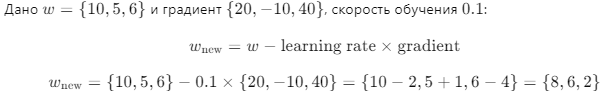

## 5. Перечислите данные, которые вам необходимы для расчета градиента функции потерь.

Ответ:

Данные для расчета градиента функции потерь:

1) Входные данные (признаки) 𝑋.

2) Реальные значения (целевые) 𝑦.

3) Предсказанные значения image.png.

4) Функция потерь (например, MSE или MAE).

## 6. Вы выполнили обучение линейной модели дважды: с регуляризацией и без. У вас есть два вектора весов модели w1 {14.37, 22.80, 32.20} и w2 {0.69, 2.02, 4.20}, но вы не помните, какой вектор весов какой модели соответствует. Как вы считаете, который из приведенных весов соответствует случаю регуляризации?

Ответ:

Сравнивая вектора
w1={14.37, 22.80, 32.20} и w2={0.69,2.02,4.20}, можно предположить, что
w2 соответствует модели с регуляризацией, так как значения весов меньше и более сглажены, что характерно для регуляризации.

## 7. Вы получили веса модели w {3, −2, 2}. В модели не используется смещение. Оцените предсказание модели для следующих значений параметров x {1, 3, 1}.

Ответ:

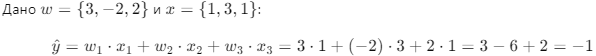

## 8. Оцените коэффициент детерминации для следующих данных: реальные значения y {1, 2, 3, 4}, предсказания модели image.png {2, 1, 4, 6}.

Ответ:

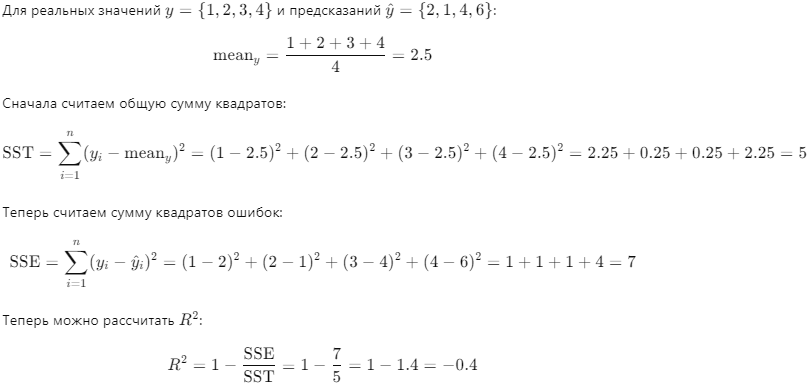